In [2]:
import pandas as pd
import numpy as np
import re
import pingouin as pg
from scipy.stats import pearsonr, spearmanr, kendalltau

## 1. Clean data

IPIP 300

In [4]:
df = pd.read_csv("../../input/IPIP_20.csv", sep=';')
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20993 entries, 0 to 20992
Columns: 374 entries, sex to sope
dtypes: float64(2), int64(369), object(3)
memory usage: 59.9+ MB
None


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,363,373) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sex,age,i1,i2,i3,i4,i5,i6,i7,i8,...,so2,so3,so4,so5,so6,sext,sagr,scon,sneu,sope
0,2,37,2,3,5,2,5,2,2,5,...,20,17,15,20,14,66,84,108,54,106
1,2,31,5,4,5,2,4,2,1,5,...,20,15,15,20,17,66,102,95,55,105
2,2,24,3,4,5,4,5,1,1,5,...,18,8,9,20,14,65,92,98,55,86


In [5]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20992 entries, 0 to 20992
Columns: 374 entries, sex to sope
dtypes: float64(5), int64(369)
memory usage: 60.1 MB


In [6]:
val0 = list(df[df.values  == 0].index)
df.drop(index=val0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7318 entries, 1 to 20989
Columns: 374 entries, sex to sope
dtypes: float64(5), int64(369)
memory usage: 20.9 MB


In [7]:
col = list(df.columns)
' , '.join(col)

'sex , age , i1 , i2 , i3 , i4 , i5 , i6 , i7 , i8 , i9 , i10 , i11 , i12 , i13 , i14 , i15 , i16 , i17 , i18 , i19 , i20 , i21 , i22 , i23 , i24 , i25 , i26 , i27 , i28 , i29 , i30 , i31 , i32 , i33 , i34 , i35 , i36 , i37 , i38 , i39 , i40 , i41 , i42 , i43 , i44 , i45 , i46 , i47 , i48 , i49 , i50 , i51 , i52 , i53 , i54 , i55 , i56 , i57 , i58 , i59 , i60 , i61 , i62 , i63 , i64 , i65 , i66 , i67 , i68 , i69 , i70 , i71 , i72 , i73 , i74 , i75 , i76 , i77 , i78 , i79 , i80 , i81 , i82 , i83 , i84 , i85 , i86 , i87 , i88 , i89 , i90 , i91 , i92 , i93 , i94 , i95 , i96 , i97 , i98 , i99 , i100 , i101 , i102 , i103 , i104 , i105 , i106 , i107 , i108 , i109 , i110 , i111 , i112 , i113 , i114 , i115 , i116 , i117 , i118 , i119 , i120 , i121 , i122 , i123 , i124 , i125 , i126 , i127 , i128 , i129 , i130 , i131 , i132 , i133 , i134 , i135 , i136 , i137 , i138 , i139 , i140 , i141 , i142 , i143 , i144 , i145 , i146 , i147 , i148 , i149 , i150 , i151 , i152 , i153 , i154 , i155 , i156 , i15

In [8]:
dft = df.filter(regex=("i\d"))
dft.head(3)
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7318 entries, 1 to 20989
Columns: 300 entries, i1 to i300
dtypes: float64(1), int64(299)
memory usage: 16.8 MB


In [9]:
dft.to_csv("../../input/clean_data/IPIP_20_test.csv")

In [10]:
dft.shape

(7318, 300)

In [11]:
dfv = df.filter(regex=("[a-zA-Z]{4}|[a-zA-Z]{2}\d"))
dfv.head(3)
dfv.columns

Index(['anxiety', 'friendli', 'imaginat', 'trust', 'selfeffi', 'anger',
       'gregar', 'artistic', 'morality', 'order', 'depress', 'assertiv',
       'emotion', 'altruism', 'dutiful', 'selfcons', 'activity', 'adventur',
       'cooperat', 'achieve', 'immodera', 'excite', 'intellec', 'modesty',
       'selfdisc', 'vulnerab', 'cheerful', 'liberal', 'sympathy', 'cautious',
       'ipipn', 'ipipe', 'ipipo', 'ipipa', 'ipipc', 'rndsplit', 'rndcorr',
       'se1', 'se2', 'se3', 'se4', 'se5', 'se6', 'sa1', 'sa2', 'sa3', 'sa4',
       'sa5', 'sa6', 'sc1', 'sc2', 'sc3', 'sc4', 'sc5', 'sc6', 'sn1', 'sn2',
       'sn3', 'sn4', 'sn5', 'sn6', 'so1', 'so2', 'so3', 'so4', 'so5', 'so6',
       'sext', 'sagr', 'scon', 'sneu', 'sope'],
      dtype='object')

In [13]:
dfv.filter(regex=("[a-zA-Z]{2}\d")).to_csv("../../input/clean_data/IPIP_20_sfacet.csv")

In [14]:
dfv.filter(regex=("^[a-zA-Z]{4}$")).to_csv("../../input/clean_data/IPIP_20_sdim.csv")

In [15]:
dfv[['anxiety', 'friendli', 'imaginat', 'trust', 'selfeffi', 'anger','gregar', 'artistic', 'morality', 'order', 
     'depress', 'assertiv','emotion', 'altruism', 'dutiful', 'selfcons', 'activity', 'adventur','cooperat', 'achieve',
     'immodera', 'excite', 'intellec', 'modesty','selfdisc', 'vulnerab', 'cheerful', 'liberal', 'sympathy','cautious',
     ]].to_csv("../../input/clean_data/IPIP_20_facet.csv")

In [16]:
dftt = dfv.filter(regex=("[a-zA-Z]{5}"))
dftt

,anxiety,friendli,imaginat,trust,selfeffi,anger,gregar,artistic,morality,order,...,liberal,sympathy,cautious,ipipn,ipipe,ipipo,ipipa,ipipc,rndsplit,rndcorr
1,23,23,43,31,37,17,13,50,43,20,...,39,40,43,130,162,256,241,218,0.87,0.53
5,50,18,19,31,29,31,10,24,43,29,...,23,37,31,265,89,127,241,166,0.93,0.60
6,27,39,49,40,46,31,37,30,31,28,...,41,27,34,151,222,244,161,219,0.83,0.51
13,36,39,39,33,36,25,35,38,44,19,...,35,38,24,175,206,228,235,175,0.94,0.59
16,49,20,49,22,28,43,15,42,39,15,...,45,46,26,259,131,271,198,151,0.96,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20982,28,20,38,21,28,31,25,29,28,32,...,28,29,22,207,138,206,155,143,0.75,0.71
20983,38,34,34,30,38,25,25,30,42,49,...,22,45,45,200,165,189,253,253,0.88,0.58
20984,29,27,37,16,42,46,21,41,32,46,...,26,20,33,182,189,203,144,249,0.91,0.56
20987,39,38,34,39,44,33,32,46,37,30,...,25,30,24,205,209,222,212,218,0.73,0.38


In [17]:
dfv[['ipipn', 'ipipe', 'ipipo', 'ipipa', 'ipipc']].to_csv("../../input/clean_data/IPIP_20_dim.csv")

IPIP 120

In [18]:
df120 = pd.read_csv("../../input/neopi_120_scores/IPIP_120.csv",sep=';')#.drop(columns=['Unnamed: 0'])
df120.head(3)

,case,sex,age,sec,min,hour,day,month,year,country,...,i111,i112,i113,i114,i115,i116,i117,i118,i119,i120
0,1,2,19,8,41,16,30,6,101,South Afr,...,5,2,4,4,4,2,4,1,5,4
1,2,2,22,24,45,16,30,6,101,USA,...,1,4,3,3,4,4,2,3,4,3
2,4,2,22,3,57,16,30,6,101,USA,...,2,3,2,4,4,2,4,2,5,4


In [19]:
col = list(df120.columns)
' , '.join(col)

'case , sex , age , sec , min , hour , day , month , year , country , i1 , i2 , i3 , i4 , i5 , i6 , i7 , i8 , i9 , i10 , i11 , i12 , i13 , i14 , i15 , i16 , i17 , i18 , i19 , i20 , i21 , i22 , i23 , i24 , i25 , i26 , i27 , i28 , i29 , i30 , i31 , i32 , i33 , i34 , i35 , i36 , i37 , i38 , i39 , i40 , i41 , i42 , i43 , i44 , i45 , i46 , i47 , i48 , i49 , i50 , i51 , i52 , i53 , i54 , i55 , i56 , i57 , i58 , i59 , i60 , i61 , i62 , i63 , i64 , i65 , i66 , i67 , i68 , i69 , i70 , i71 , i72 , i73 , i74 , i75 , i76 , i77 , i78 , i79 , i80 , i81 , i82 , i83 , i84 , i85 , i86 , i87 , i88 , i89 , i90 , i91 , i92 , i93 , i94 , i95 , i96 , i97 , i98 , i99 , i100 , i101 , i102 , i103 , i104 , i105 , i106 , i107 , i108 , i109 , i110 , i111 , i112 , i113 , i114 , i115 , i116 , i117 , i118 , i119 , i120'

In [20]:
df120 = df120.apply(pd.to_numeric, errors='coerce')
df120.head(3)

,case,sex,age,sec,min,hour,day,month,year,country,...,i111,i112,i113,i114,i115,i116,i117,i118,i119,i120
0,1,2,19,8,41,16,30,6,101,NaN,...,5,2,4,4,4,2,4,1,5,4
1,2,2,22,24,45,16,30,6,101,NaN,...,1,4,3,3,4,4,2,3,4,3
2,4,2,22,3,57,16,30,6,101,NaN,...,2,3,2,4,4,2,4,2,5,4


In [21]:
val0120 = list(df120[df120.values  == 0].index)
df120.drop(index=val0120, inplace=True)
df120.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345780 entries, 0 to 619149
Columns: 130 entries, case to i120
dtypes: float64(1), int64(129)
memory usage: 345.6 MB


In [22]:
df120 = df120.filter(regex=("i\d"))
df120 = df120.dropna()
df120.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345780 entries, 0 to 619149
Columns: 120 entries, i1 to i120
dtypes: int64(120)
memory usage: 319.2 MB


In [24]:
df120.head(7000).to_csv("../../input/clean_data/IPIP_120_test1.csv")
df120.tail(7000).to_csv("../../input/clean_data/IPIP_120_test2.csv")

### Decriptive dataframe

IPIP 300

In [25]:
def dim(key):
    if 'N' in key:
        return 'Neuroticism'
    elif 'E' in key:
        return 'Extraversion'
    elif 'O' in key:
        return 'Openness'
    elif 'A' in key:
        return 'Agreeableness'
    elif 'C' in key:
        return 'Conscientiousness'

In [22]:
ddf = pd.read_csv("../../neopi_300_scores/neopi_300_input.csv", sep=';')
ddf.drop(columns=['Instructions','Final score after reverse scoring is applied \n(automatically generated)', 
                  'Input score (1-5)'], inplace=True)
ddf['item#'] = ddf['Full#'].apply(lambda x: 'i'+str(x))
ddf.drop(columns=['Full#'])

,Sign,Key,Facet,Item,item#
0,+N1,N1,Anxiety,Worry about things.,i1
1,+E1,E1,Friendliness,Make friends easily.,i2
2,+O1,O1,Imagination,Have a vivid imagination.,i3
3,+A1,A1,Trust,Trust others.,i4
4,+C1,C1,Self-Efficacy,Complete tasks successfully.,i5
...,...,...,...,...,...
295,-N6,N6,Vulnerability,Am calm even in tense situations.,i296
296,-E6,E6,Cheerfulness,Seldom joke around.,i297
297,-O6,O6,Liberalism,Like to stand during the national anthem.,i298
298,-A6,A6,Sympathy,Can't stand weak people.,i299


In [23]:
ddf['Dimension'] = ddf['Key'].apply(dim)
ddf = ddf[['item#','Item','Sign','Key','Dimension','Facet']]
ddf.iloc[42]

item#                           i43
Item         Feel others' emotions.
Sign                            +O3
Key                              O3
Dimension                  Openness
Facet                  Emotionality
Name: 42, dtype: object

In [24]:
ddf.to_csv("../../data/clean_data/IPIP_20_desc_item.csv")

IPIP 120

In [25]:
ddf120 = pd.read_csv("../../data/neopi_120_scores/neopi_120_input.csv", sep=';')
ddf120.head(3)

,M5 #,M5-120 #,Facet,Facet Name,Text,Score F/R,Unnamed: 6,Actual,Rcorrected,Unnamed: 9
0,1,1,N1,Anxiety,Worry about things,F,NaN,2,2,NaN
1,32,2,E1,Friendliness,Make friends easily,F,NaN,2,2,NaN
2,3,3,O1,Imagination,Have a vivid imagination,F,NaN,1,1,NaN


In [26]:
ddf120.drop(columns=['M5 #','Score F/R','Unnamed: 6','Actual','Rcorrected','Unnamed: 9'], inplace=True)
ddf120['item#'] = ddf120['M5-120 #'].apply(lambda x: 'i'+str(x))
ddf120.drop(columns=['M5-120 #'],inplace=True)
ddf120.head(3)

,Facet,Facet Name,Text,item#
0,N1,Anxiety,Worry about things,i1
1,E1,Friendliness,Make friends easily,i2
2,O1,Imagination,Have a vivid imagination,i3


In [55]:
ddf120['Dimension'] = ddf120['Facet'].apply(dim)
ddf120.rename(columns={ "Facet": "Key","Facet Name": "Facet", "Text": "Item"}, inplace=True)

In [56]:
ddf120.columns

Index(['Key', 'Facet', 'Item', 'item#', 'Dimension'], dtype='object')

In [58]:
ddf120 = ddf120[['item#','Item','Key','Dimension','Facet']]
ddf120.head(3)

,item#,Item,Key,Dimension,Facet
0,i1,Worry about things,N1,Neuroticism,Anxiety
1,i2,Make friends easily,E1,Extraversion,Friendliness
2,i3,Have a vivid imagination,O1,Openness,Imagination


In [59]:
ddf120.to_csv("../../data/clean_data/IPIP_120_desc_item.csv")

DIMENSION-FACET DATA

In [27]:
ddf.groupby(['Dimension', 'Facet']).size().reset_index().columns

Index(['Dimension', 'Facet', 0], dtype='object')

In [28]:
facet_data = ddf.groupby(['Dimension', 'Facet','Key']).size().reset_index().drop(columns = [0])
facet_data

,Dimension,Facet,Key
0,Agreeableness,Altruism,A3
1,Agreeableness,Cooperation,A4
2,Agreeableness,Modesty,A5
3,Agreeableness,Morality,A2
4,Agreeableness,Sympathy,A6
5,Agreeableness,Trust,A1
6,Conscientiousness,Achievement-Striving,C4
7,Conscientiousness,Cautiousness,C6
8,Conscientiousness,Dutifulness,C3
9,Conscientiousness,Orderliness,C2


In [29]:
def item(it):
    return ['i'+str(e+1) for e in list(ddf[ddf['Facet'].str.match(it)].index)]

facet_data['items'] = facet_data['Facet'].apply(item)
facet_data.head(3)

,Dimension,Facet,Key,items
0,Agreeableness,Altruism,A3,"[i14, i44, i74, i104, i134, i164, i194, i224, ..."
1,Agreeableness,Cooperation,A4,"[i19, i49, i79, i109, i139, i169, i199, i229, ..."
2,Agreeableness,Modesty,A5,"[i24, i54, i84, i114, i144, i174, i204, i234, ..."


In [30]:
facet_data.to_csv("../../data/clean_data/IPIP_20_desc_fac.csv")

## 2. Item validity

### - Homogeneity index
* Pearson correaltion between the item ant the toal score of the item: In this case the correaltion must be with the **factor** and the **dimension**

Test

In [31]:
columns = ["1", "2", "3", "X"]
rows = ["1", "2", "3", "4", "5"]
data = np.array([[2, 3, 5, 10], [3, 1, 0, 4], [5, 4, 5, 14], [0, 1, 0, 1],[4, 3, 0, 7]])
dff = pd.DataFrame(data=data, index=rows, columns=columns)
dff

,1,2,3,X
1,2,3,5,10
2,3,1,0,4
3,5,4,5,14
4,0,1,0,1
5,4,3,0,7


In [32]:
pg.corr(dff['2'],dff['X'], method='pearson').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,5,0.941,"[0.35, 1.0]",0.885,0.771,0.017,4.412,0.758


In [33]:
pg.corr(dff['2'],dff['X'], method='pearson').round(3)['r']

pearson    0.941
Name: r, dtype: float64

In [34]:
r, pval = pearsonr(dff['2'],dff['X'])
print(r)
print(pval)

0.9409729949679593
0.017061880843009504


In [35]:
def pearson(df, lis, vcol):
    daf = []
    for e in lis:
        r = pg.corr(df[e],df[vcol], method='pearson').round(3)['r']
        adj_r = pg.corr(df[e],df[vcol], method='pearson').round(3)['r2']
        tot = ("%s, %f, %f" % (e, r, adj_r))
        daf.append(tot)
    dft = pd.DataFrame(columns= ['item', 'r', 'r2'],data=[row.split(',') for row in daf[0:]])
    return dft

In [36]:
lista = list(dff.drop(columns=['X']).columns)
pearson(dff, lista, 'X')

,item,r,r2
0,1,0.749000,0.560000
1,2,0.941000,0.885000
2,3,0.864000,0.747000


**Altruism** items homogeneity

In [37]:
alt = facet_data.iloc[12]['items']
pearson(df, alt, 'altruism')

,item,r,r2
0,i17,0.170000,0.029000
1,i47,0.188000,0.035000
2,i77,0.181000,0.033000
3,i107,0.140000,0.020000
4,i137,0.001000,0.000000
5,i167,0.006000,0.000000
6,i197,-0.059000,0.003000
7,i227,0.004000,0.000000
8,i257,-0.116000,0.014000
9,i287,0.063000,0.004000


In [38]:
altr = df[['i14', 'i44', 'i74', 'i104', 'i134', 'i164', 'i194', 'i224', 'i254', 'i284']]

## Analize factors

In [39]:
import matplotlib.pyplot as plt

In [40]:
f_lis = ['anxiety' , 'friendli' , 'imaginat' , 'trust' , 'selfeffi' , 'anger' , 'gregar' , 'artistic' , 'morality' , 
         'order' , 'depress' , 'assertiv' , 'emotion' , 'altruism' , 'dutiful' , 'selfcons' , 'activity' , 'adventur',
         'cooperat' , 'achieve' , 'immodera' , 'excite' , 'intellec' , 'modesty' , 'selfdisc' , 'vulnerab' , 
         'cheerful' , 'liberal' , 'sympathy' , 'cautious']

In [41]:
#for e in f_lis:
#    plt.figure()
#    df[e].hist(bins=40)
#    plt.legend([e])

### Factorial analisis - 1 factor

Facet: Altruism

In [42]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

**Bartlett’s test of sphericity** checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. 

If the test found statistically insignificant, you should not employ a factor analysis.

In [43]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(altr)
chi_square_value, p_value

(20762.182403141975, 0.0)

- **p-value is 0**: The test was statistically significant (indicating that the observed correlation matrix is not an identity matrix)

**Kaiser-Meyer-Olkin (KMO)** Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. 

KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [44]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(altr)
kmo_model

0.8955800181808267

#### Choosing the Number of Factors

For choosing the number of factors, you can use the **Kaiser criterion** and **scree plot**. Both are based on eigenvalues.

**Kaiser criterion**

In [45]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(altr)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=3, rotation=None, rotation_kwargs={},
        use_smc=True)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.1809481 , 0.98063443, 0.87524983, 0.76029069, 0.62601825,
       0.58581945, 0.57830495, 0.53368184, 0.49921485, 0.3798376 ])

In [46]:
len([e for e in ev if e > ev.mean() + 1 * ev.std()])

1

* Here, we can see only for 1-factors eigenvalues is greater than one. It means we need to choose only 1 factor (or unobserved variables).

**Scree plot**

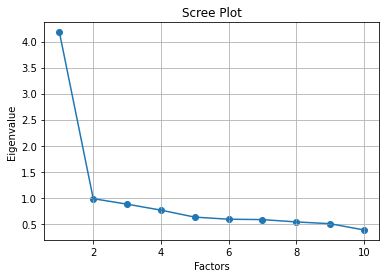

In [47]:
# Create scree plot using matplotlib
plt.scatter(range(1,altr.shape[1]+1),ev)
plt.plot(range(1,altr.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

* The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.
    
    Here, you can see only for 1-factors eigenvalues is greater than one. It means we need to choose only 1 factor (or unobserved variables).

#### Performing Factor Analysis

In [48]:
far = FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=1, rotation=None, rotation_kwargs={},
        use_smc=True)
far.fit(altr)

load = far.loadings_

In [49]:
pd.DataFrame.from_records(load, index = altr.columns, columns = ['altruism'])

,altruism
i14,-0.584900
i44,-0.565677
i74,-0.692289
i104,-0.714896
i134,-0.502838
i164,-0.539476
i194,-0.631056
i224,-0.483760
i254,-0.581625
i284,-0.622891
